In [1]:
# basic imports.  
import os
import numpy as np

backend='nbagg' # Use the 'nbagg' backend to render and you can zoom and pan plots.  
#backend='inline' # 
if backend=='nbagg':
    import matplotlib
    matplotlib.use('nbagg') # Use the 'nbagg' backend
else:
    %matplotlib inline # magic command to render inline
    
#import matplotlib.pyplot must be after matplotlib.use('nbagg') 
import matplotlib.pyplot as plt

#the m8r library is used to read and write madagascar data
import m8r 

In [2]:
#create a numpy ndarray (a 2D array) of all floating point zeros
a = np.zeros((61,72),dtype='float32') 
# Make a section with two faulsted horizons.  Sample rate is 4 ms.
# Data will be high cut filterred at 62.5 hz.
# Make two horizons. fault at center has throw of two samples.
# On left side of section horizons are at samples 24 and 28.
# On right side of section horizons are at samples 22 and 46.
a[0:30,24]=1.0
a[30:61,22]=1.0
a[0:30,48]=1.0
a[30:61,46]=1.0

In [3]:
#open and output file in madagascar .rsf format.  
file1=m8r.Output('file1.rsf')
# Set n1, o1, and d1 in the output file.  This is the fastest index.
# The numpy ndarray is ahape (n2,n1), fastest index is last.
file1.put('n1',72)
file1.put('o1',0)
file1.put('d1',.004)
# Set n2, o2, and d2 in the output file.
file1.put('n2',61)
file1.put('o2',1)
file1.put('d2',1)

# Write the data to disc and close the file
file1.write(a)
file1.close()

In [12]:
# print m8r.Output documentation.  Needs to be writen.
m8r.Output?

In [5]:
# Apply bandpass filter using madagascar.  My notebook is python3, but my madagascar is python 2.  
# It works!
os.system('sfbandpass <file1.rsf fhi=62.5 > file2.rsf') 

0

In [13]:
# plot the bandlimitted data using madagascar sfwiggle. Run in background.
os.system('sfwiggle <file2.rsf pclip=99.7 transp=y yreverse=y poly=y|sfpen &')

0

In [7]:
# print shape of the a array (created with a = np.zeros((61,72),dtype='float32') )
a.shape

(61, 72)

<IPython.core.display.Javascript object>


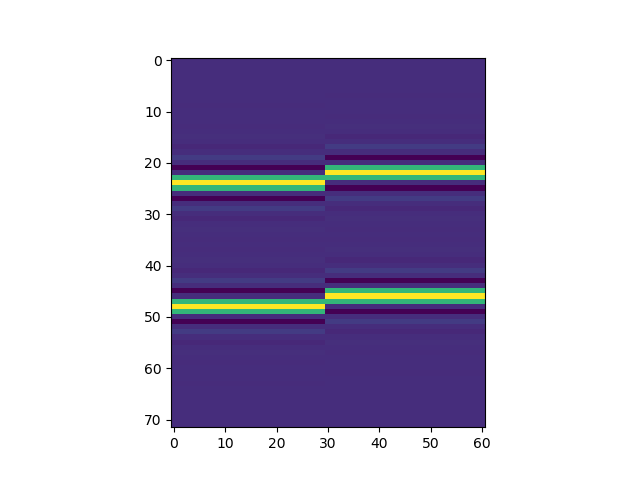

In [8]:
#read 'file2.rsf' into numpy ndarray and plot using matplotlib.pyplot.imshow
file2 = m8r.Input('file2.rsf') 
b=file2.read()
plt.imshow(b.T)
plt.show()

In [9]:
a.shape[0]

61

<IPython.core.display.Javascript object>


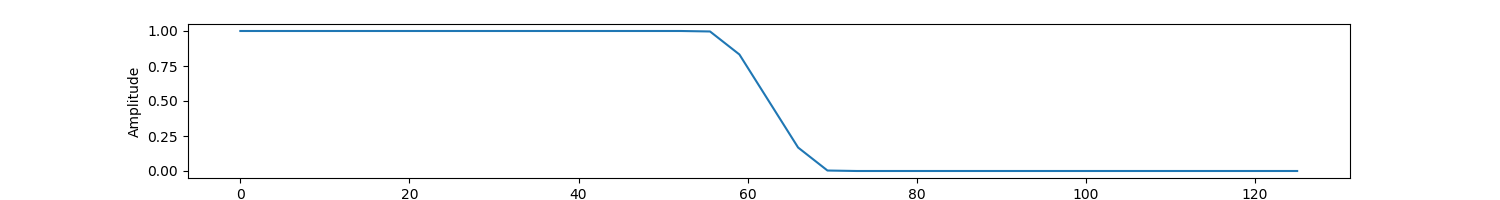

<IPython.core.display.Javascript object>


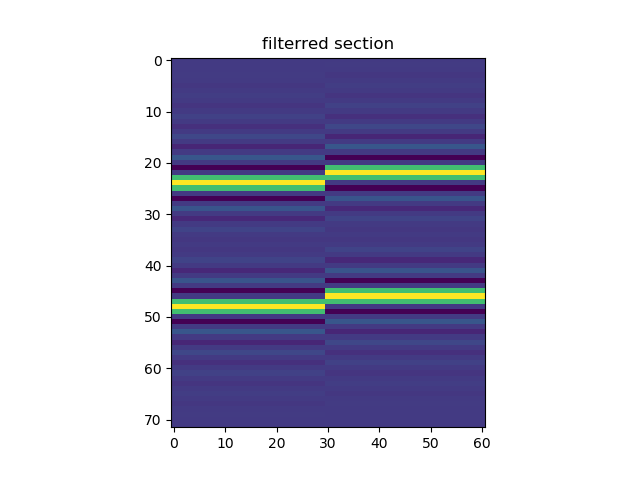

In [10]:
deltat=.004
itrace=0
trace=a[0]
frequencies=np.fft.rfftfreq(trace.size,d=deltat)

# apply high cut filter using numpy library
ramp_freq=np.array([.0,55.,70.,125.])
ramp_amp =np.array([1.0,1.0, .0,.0])
ramp=np.square(np.cos(np.pi/2.0*(1.0-np.interp(frequencies,ramp_freq,ramp_amp))))
fig, ax = plt.subplots(figsize=(15, 2))
plt.plot(frequencies,ramp)
plt.show()

a_filterred = np.zeros((61,72),dtype='float32') 
for itrace in range(a.shape[0]):
    trace=a[itrace]
    TRACE=np.fft.rfft(trace)
    TRACE_FILTERRED=ramp*TRACE
    trace_filterred=np.fft.irfft(TRACE_FILTERRED)
    a_filterred[itrace,:]=trace_filterred

ax.set_xlabel('Time in Seconds')
ax.set_ylabel('Amplitude')
plt.title('filterred section')
plt.imshow(a_filterred.T)
plt.show()



